In [76]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib import cm
#from matplotlib.ticker import LinearLocator
from sympy import *
#from sympy.physics.quantum.dagger import Dagger
#init_printing(use_latex='mathjax')

Seja o potencial da forma

$$ V(r)= 4{V}_0 \left[ \left( \frac{s}{r} \right)^{12} - \left( \frac{s}{r} \right)^{6} \right]$$

com $V_0$ e $s$ parâmetros constantes e reais, enquanto $r$ representa a distancia de um objeto físico à origem do potencial. Podemos defini-lo simbolicamente dentro do python como:

In [77]:
V_0 = symbols('V_0',real=True)
s = symbols('s',real=True)
r = symbols('r', positive=True)


V= 4*V_0*((s/r)**(12) - (s/r)**6)

display(V)

     ⎛   6    12⎞
     ⎜  s    s  ⎟
4⋅V₀⋅⎜- ── + ───⎟
     ⎜   6    12⎟
     ⎝  r    r  ⎠

O mesmo pode ser presentado gráficamente como:

Text(0, 0.5, '$V(V_0)$')

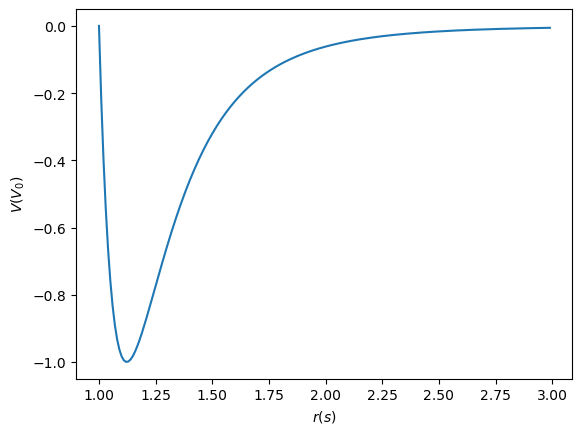

In [78]:
fig, ax = plt.subplots()
x = np.arange(1, 3, 0.01)
f1 = lambdify(r, V.subs(V_0,1).subs(s,1), "numpy") #Aqui traduz-se uma função do sympy para o numpy, substituindo alguns valores
y=f1(x)

ax.plot(x, y)
plt.xlabel(r"$r(s)$")
plt.ylabel(r"$V(V_0)$")


Vamos encontrar simbólicamente o mínimo deste potencial. Primeiramente encontrando a derivada primeira do potencial:
$$ \frac{d V(r)}{dr} $$

In [79]:
dV1 = diff(V, r)
display(dV1)

     ⎛   6       12⎞
     ⎜6⋅s    12⋅s  ⎟
4⋅V₀⋅⎜──── - ──────⎟
     ⎜  7      13  ⎟
     ⎝ r      r    ⎠

O mínimo ocorre quando a derivada primeira é zero. Ou seja

In [80]:
solve(dV1,r)

⎡                     ⎛  6 ___   6 ___     ⎞    ⎛  6 ___   6 ___     ⎞    ⎛6 _
⎢ 6 ___    6 ___      ⎜  ╲╱ 2    ╲╱ 2 ⋅√3⋅ⅈ⎟    ⎜  ╲╱ 2    ╲╱ 2 ⋅√3⋅ⅈ⎟    ⎜╲╱ 
⎢-╲╱ 2 ⋅s, ╲╱ 2 ⋅s, s⋅⎜- ───── - ──────────⎟, s⋅⎜- ───── + ──────────⎟, s⋅⎜───
⎣                     ⎝    2         2     ⎠    ⎝    2         2     ⎠    ⎝  2

__   6 ___     ⎞    ⎛6 ___   6 ___     ⎞⎤
2    ╲╱ 2 ⋅√3⋅ⅈ⎟    ⎜╲╱ 2    ╲╱ 2 ⋅√3⋅ⅈ⎟⎥
── - ──────────⎟, s⋅⎜───── + ──────────⎟⎥
         2     ⎠    ⎝  2         2     ⎠⎦

Como $r$ só pode assumir valores positivos e reais (ja que é uma posição), então temos apenas uma solução:

In [73]:
r0=solve(dV1,r)[1]
display(r0)

6 ___  
╲╱ 2 ⋅s

Podemos agora calcular a derivada segunda exatamente no ponto de mínimo e encontrar a expressão para a constante elástica deste potencial
$$ k = \frac{d^2V(r_0)}{dr^2} $$

In [81]:
dV2 = diff(dV1, r)
display(dV2.subs(r,r0))

    2/3   
36⋅2   ⋅V₀
──────────
     2    
    s     

**Faça o mesmo exercício agora para o seguinte potencial
$$ V(r) = D \left[ 1 - e^{-a (r - r_e)} \right]$$
e encontre o ponto de mínimo e a sua constante elástica em termos dos parâmetros $D$ e $r_e$**